# Problem statement:
This dataset has total 25 columns and 7752 rows. Our task is to analyze the dataset and predict the expected min and max temp by developing a Regression model.

In [168]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE



In [123]:
df = pd.read_csv('Bias_correction_ucl.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [124]:
df.shape

(7752, 25)

In [125]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [126]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [127]:
df.dropna(axis=0,how='any',inplace=True)

In [128]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [129]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [130]:
df.drop(['station','Date'],axis=1,inplace=True)

In [157]:
df=df.astype(int)

In [158]:
df.dtypes

Present_Tmax        int32
Present_Tmin        int32
LDAPS_RHmin         int32
LDAPS_RHmax         int32
LDAPS_Tmax_lapse    int32
LDAPS_Tmin_lapse    int32
LDAPS_WS            int32
LDAPS_LH            int32
LDAPS_CC1           int32
LDAPS_CC2           int32
LDAPS_CC3           int32
LDAPS_CC4           int32
LDAPS_PPT1          int32
LDAPS_PPT2          int32
LDAPS_PPT3          int32
LDAPS_PPT4          int32
lat                 int32
lon                 int32
DEM                 int32
Slope               int32
Solar radiation     int32
Next_Tmax           int32
Next_Tmin           int32
dtype: object

In [132]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Present_Tmax : [28.7 31.9 31.6 32.  31.4 32.1 31.7 31.3 32.5 30.7 32.8 30.9 32.2 32.7
 31.5 28.3 30.5 30.3 31.  30.8 30.  30.6 30.1 29.9 31.8 24.4 27.  28.
 27.7 27.8 28.8 27.6 26.9 27.5 28.6 26.2 28.4 26.7 29.  26.6 27.1 28.1
 27.9 28.5 30.4 29.1 28.9 29.4 31.1 29.5 29.6 24.9 28.2 26.1 27.2 26.5
 27.4 30.2 32.4 29.3 29.8 33.5 29.2 29.7 25.9 23.1 24.8 26.3 26.8 25.8
 25.3 25.1 24.5 25.4 26.  25.6 26.4 27.3 25.2 23.3 25.7 25.  25.5 22.4
 24.6 24.2 24.7 24.3 23.6 24.1 23.  23.7 23.8 22.9 24.  22.7 31.2 32.6
 32.9 33.2 33.6 33.4 33.9 32.3 33.1 33.  34.  33.3 34.7 34.3 34.1 33.8
 33.7 35.2 34.9 34.8 34.2 35.5 34.5 34.4 35.1 21.2 23.4 23.2 23.9 23.5
 35.7 34.6 22.5 21.7 22.8 35.9 35.3 20.6 21.9 22.2 20.4 22.  35.  36.5
 35.4 35.6 21.4 21.6 22.1 22.6 37.5 20.7 21.5 36.  36.2 37.2 36.6 35.8
 36.7 36.8 37.1 36.3 37.6 36.9 36.1 20.1 22.3 21.8 36.4 20.3 20. ]
Present_Tmin : [21.4 21.6 23.3 23.4 21.9 23.5 24.4 23.6 22.  20.5 22.2 23.8 20.1 22.8
 23.9 25.  24.2 21.2 22.9 24.5 22.6 24.1 23.1 21.7 2

In [133]:
categorical_val

[]

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

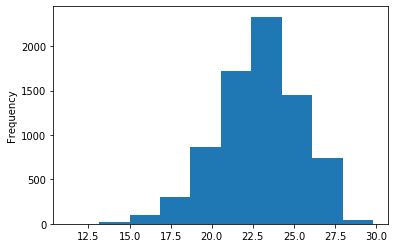

In [134]:
#Check skewness of data set
df['Next_Tmin'].plot.hist()

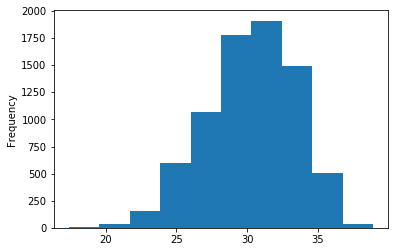

In [135]:
#Check skewness of data set
df['Next_Tmax'].plot.hist()

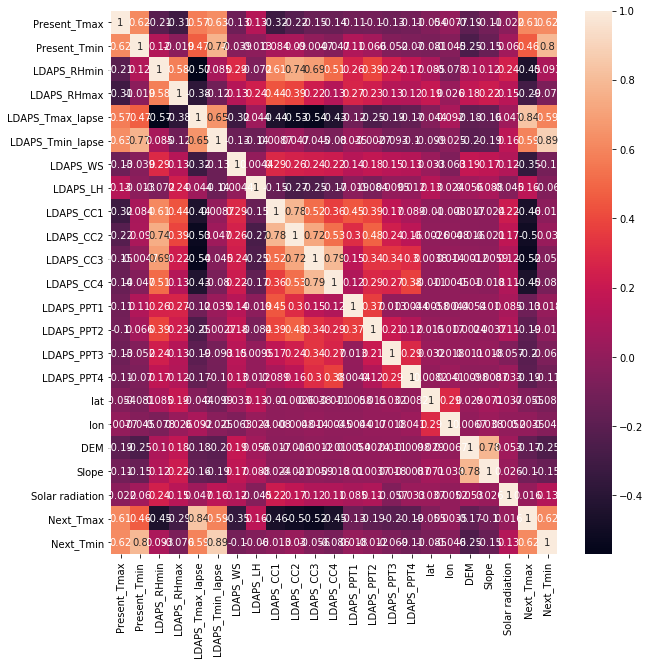

In [136]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

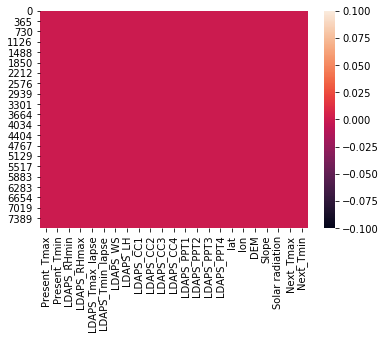

In [137]:
sns.heatmap(df.isnull())

# Model Selection for max Temp:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the Tmax which can be increase exponetially. This scenario is a classic example of Regressions.

We are provided with 7588 rows of the labeled dataset tagged with the output column “Tmin” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

LogisticRegression()

SVC()

DecisionTreeClassifier()

KNeighborsClassifier()

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [159]:
y = df['Next_Tmin']
y.shape

(7588,)

In [160]:
x = df.drop(['Next_Tmin'],axis=1)
x.shape

(7588, 22)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [174]:
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print('score',r2_score(y_test,predm))
    print('\n')

error
mae 0.8376397522591377
mse 1.1409752208685215
rmse 1.0681644165897504
score 0.8154676959301008


error
mae 0.8498683055311677
mse 1.5452151009657595
rmse 1.2430668127521383
score 0.7500891363374564


error
mae 0.6616505706760317
mse 0.7378121158911325
rmse 0.8589599035409816
score 0.8806721064350203




# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 81%

Accuracy score of DecisionTreeRegressor() is 75%

Accuracy score of RandomForestRegressor() is 88%

Hence we can say that out all algorithems RandomForestRegressor() is best for this problem till now however we will use cross validation to select best model.

In [175]:
lm =RandomForestRegressor()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [26.79 22.12 23.9  ... 19.97 19.67 21.6 ]
actual value 5896    27
4379    22
3392    24
5846    26
5686    25
        ..
2213    20
7418    23
3018    19
3170    20
1957    22
Name: Next_Tmin, Length: 1139, dtype: int32
error
mae 0.6648902546093065
mse 0.7496562774363477
rmse 0.8658269327275213
score 0.8806721064350203


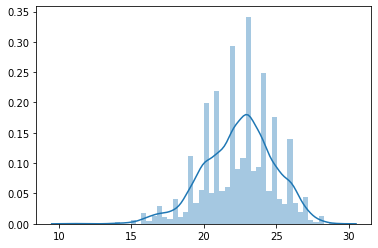

In [176]:
sns.distplot((y_test,pred),bins=50)

# Model Validation

In [177]:
clf = RandomForestRegressor()

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores.mean()

0.7657566193148809

# Save the model using Pickle

In [178]:
# Save the model using pickle
import pickle

filename = "pickleRFRfile.pkl"
pickle.dump(lm, open(filename, 'wb'))


# Model Selection for max Temp:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the Tmax which can be increase exponetially. This scenario is a classic example of Regressions.

We are provided with 7588 rows of the labeled dataset tagged with the output column “Tmax” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Linear problem. Based on these criteria we can narrow down our choice of models to a few:

LogisticRegression()

SVC()

DecisionTreeClassifier()

KNeighborsClassifier()

In [179]:
y = df['Next_Tmax']
y.shape

(7588,)

In [180]:
x = df.drop(['Next_Tmax'],axis=1)
x.shape

(7588, 22)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [182]:
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print('score',r2_score(y_test,predm))
    print('\n')

error
mae 1.228378156317436
mse 2.527271502631666
rmse 1.5897394448876412
score 0.7279770857138862


error
mae 1.1431079894644425
mse 2.742756804214223
rmse 1.65612704953884
score 0.7047833213473467


error
mae 0.8571115013169447
mse 1.3920106233538194
rmse 1.1798349983594398
score 0.8501709111634284




# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 72%

Accuracy score of DecisionTreeRegressor() is 70%

Accuracy score of RandomForestRegressor() is 85%

Hence we can say that out all algorithems RandomForestRegressor() is best for this problem till now however we will use cross validation to select best model.



In [183]:
lm =RandomForestRegressor()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [33.61 28.99 27.48 ... 29.45 27.79 29.58]
actual value 5896    33
4379    28
3392    28
5846    34
5686    36
        ..
2213    30
7418    30
3018    30
3170    28
1957    29
Name: Next_Tmax, Length: 1139, dtype: int32
error
mae 0.8578226514486391
mse 1.3786103599648816
rmse 1.1741423933939537
score 0.8501709111634284


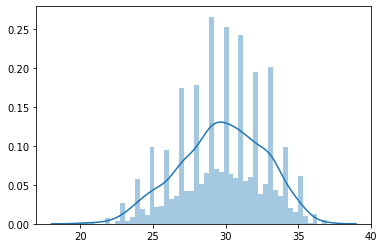

In [184]:
sns.distplot((y_test,pred),bins=50)

# Model Validation

In [186]:
clf = RandomForestRegressor()

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores

array([0.67200231, 0.61550428, 0.662717  , 0.84972369, 0.67068318])

# Conclusion

we achieved highest accuracy score of 85% by using RandomForestRegressor() which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the min and max Temp.